In [1]:
from dLSIpy import *
from biospeckle_tools_Gustavo import *
from Biospeckle_Gustavo import *


In [2]:

import os 
import numpy as np
import matplotlib.pyplot as plt

allfiles = os.listdir(os.getcwd())

Dirs = []

for i in allfiles:
    Dir = os.path.isdir(i)

    if Dir == True:
        if str('.i') not in i and str('__') not in i:
            Dirs.append(i)

print('Carpetas disponibles')

for i in range(0,len(Dirs)):
    print(i,'-',Dirs[i])

n = int(input('Elija una carpeta ingresando su numero (int):'))

allfiles=os.listdir(Dirs[n])

files = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
            if str('.') not in i:
                files.append(i)

for i in range(0,len(files)):
    print(i,'-',files[i])

m = int(input('Elija una carpeta ingresando su numero (int):'))

Direccion = Dirs[n] + '/' + files[m]          

Direccion


Carpetas disponibles
0 - ANALISIS
1 - Wavelet_decomposition


Elija una carpeta ingresando su numero (int): c


KeyboardInterrupt: 

In [3]:

data = datapack(Direccion)

data.shape


(3497, 300, 400)

In [4]:
data.shape[0]/(60)

dt = 60/data.shape[0]

dt

0.017157563625965114

In [34]:
data = Select_frame_from_data(data,2)


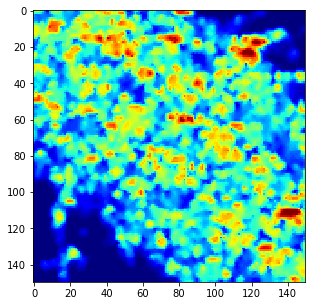

In [6]:
plt.figure(figsize=(5,5))

plt.imshow(data[0,75:225,190:340],cmap='jet')

In [7]:

dt = 60/data.shape[0]

#dt = 0.08
#NN = 2**int(np.log2(data.shape[0]))

NN = 256

#Pul primario
#DATA = data[:NN,100:325,150:350]

#Pul secu
#DATA = data[:NN,70:300,120:340]

#Pul Tallo
DATA = data[:NN,75:225,190:340]


#Peciolo
#DATA=data[:NN,:,90:175]

#DATA = data[:NN]

#DATA[DATA<1] = 1

cw,s = CWT(DATA,dt=dt)

#freq = Wavelet_Blocks(DATA,wx=20,wy=20,dt=dt,Dir=Dirs[n])


In [8]:

w0 = 6

freq = 1/(4 *np.pi*s/(w0 + (2 + w0 ** 2)**.5))

DomT = np.max(freq)

Fint = 2

Nn = int(DomT/Fint)+1

Freqlist = []

Scallist = []

slist = []

for n in range(Nn):

    sp = np.where((freq>=n*Fint)&(freq<(n+1)*Fint))[0]
    
    if len(sp)>0:
        
        Freqlist.append(freq[sp])
        Scallist.append(s[sp])
        slist.append(sp)

Scallist


[array([0.48736931, 0.53148   , 0.57958305, 0.6320398 , 0.68924428,
        0.75162622, 0.81965421, 0.89383925, 0.97473861, 1.06296   ,
        1.1591661 , 1.26407959, 1.37848857, 1.50325244, 1.63930841,
        1.7876785 , 1.94947723, 2.12591999, 2.31833219, 2.52815918,
        2.75697714, 3.00650489, 3.27861683, 3.575357  , 3.89895446,
        4.25183999]),
 array([0.24368465, 0.26574   , 0.28979152, 0.3160199 , 0.34462214,
        0.37581311, 0.4098271 , 0.44691963]),
 array([0.17231107, 0.18790656, 0.20491355, 0.22345981]),
 array([0.12184233, 0.13287   , 0.14489576, 0.15800995]),
 array([0.10245678, 0.11172991]),
 array([0.08615554, 0.09395328]),
 array([0.07244788, 0.07900497]),
 array([0.06092116, 0.066435  ]),
 array([0.05586495]),
 array([0.05122839]),
 array([0.04697664]),
 array([0.04307777]),
 array([0.03950249]),
 array([0.03622394]),
 array([0.0332175])]

In [9]:

Wavelet_reconstruct_with_saving(cw,DATA,dt,Freqlist,Scallist,slist,Dir=Dirs[n])


Reconstrucion on Band 0  completed
Reconstrucion on Band 1  completed
Reconstrucion on Band 2  completed
Reconstrucion on Band 3  completed
Reconstrucion on Band 4  completed
Reconstrucion on Band 5  completed
Reconstrucion on Band 6  completed
Reconstrucion on Band 7  completed


In [10]:
j = 0

print(freq[slist[j]])

DAT = Reconstruction(cw, DATA, dt, 0, Scallist[j],slist=slist[j])

#DAT = Reconstruction(cw, data[:NN], dt, 0, s)

DAT = np.array(DAT,dtype=np.uint8)

IM = graphim(data[:NN])
IMD = graphim(DAT,10)
vmin = np.min(IMD)
vmax = np.max(IMD)


[1.959375   1.7967548  1.64763141 1.51088467 1.38548735 1.2704975
 1.16505135 1.06835679 0.9796875  0.8983774  0.82381571 0.75544233
 0.69274367 0.63524875 0.58252567 0.5341784  0.48984375 0.4491887
 0.41190785 0.37772117 0.34637184 0.31762438 0.29126284 0.2670892
 0.24492188]


In [9]:
DATOSPUTOS = []
FLims = []

for j in range(len(slist)):

    print(freq[slist[j]])

    DAT = Reconstruction(cw, DATA, dt, 0, s[slist[j]],slist=slist[j])

    DAT = np.array(DAT,dtype=np.uint8)

    #DAT[DAT<1]=0

    #EXTR = np.mean(DAT)+13*np.std(DAT)

    #DAT[DAT>EXTR]=0

    DATOSPUTOS.append(DAT)
    
    Fmax = np.round(np.max(Freqlist[j]),2)

    Fmin = np.round(np.min(Freqlist[j]),2)

    FLims.append(str(Fmin) + '-' + str(Fmax) + ' Hz')



[1.9862008  1.82135417 1.67018913 1.53157019 1.40445606 1.28789188
 1.18100206 1.08298367 0.9931004  0.91067708 0.83509457 0.76578509
 0.70222803 0.64394594 0.59050103 0.54149183 0.4965502  0.45533854
 0.41754728 0.38289255 0.35111401 0.32197297 0.29525052 0.27074592
 0.2482751  0.22766927]
[3.97240161 3.64270833 3.34037827 3.06314038 2.80891211 2.57578376
 2.36200413 2.16596733]
[5.61782423 5.15156753 4.72400825 4.33193467]
[7.94480321 7.28541667 6.68075654 6.12628076]
[9.44801651 8.66386934]
[11.23564845 10.30313506]
[13.36151308 12.25256152]
[15.88960642 14.57083333]
[17.32773867]
[18.89603301]
[20.60627012]
[22.4712969]
[24.50512303]
[26.72302616]
[29.14166667]


In [10]:
DATOSPUTOS[0].shape

(256, 150, 150)

In [11]:
def graphmhi(data,THR = 10):
    import numpy as np
    
    m = data.shape[0]
    
    T = np.zeros(data.shape)
    
    MHI = np.zeros((data.shape[1],data.shape[2]))
    
    k = 255/sum(np.arange(0,m,1))
    
    for i in range(m-1):
        
        S = data[i]-data[i+1]

        T[i] = abs(S) > THR

        MHI += T[i]*k

    return MHI

def graphmhi2(data,THR1 = 10, THR2= 20):
    
    import numpy as np
    
    m = data.shape[0]
    
    Tinf = np.zeros(data.shape)
    Tsup = np.zeros(data.shape)
    
    MHI = np.zeros((data.shape[1],data.shape[2]))
    
    k = 255/sum(np.arange(0,m,1))
    
    for i in range(m-1):
        
        S = data[i]-data[i+1]

        Tinf[i] = abs(S) > THR1
        
        Tsup[i] = abs(S) < THR2

        MHI += Tinf[i]*Tsup[i]*k

    return MHI


Parte de la planta Tallo


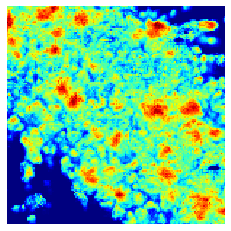

In [11]:

THR = 10

ORIG = graphmhi(DATA,THR)

vmin=np.min(ORIG)
vmax=np.max(ORIG)

plt.imshow(ORIG,cmap='jet',vmin=vmin,vmax=vmax)

plt.axis('off')

Nparte = input('Parte de la planta')

plt.savefig(Nparte+'_original.png',dpi=100)


In [12]:
np.max(ORIG)

213.390625

147.8984375
147.0625
136.390625
152.109375
130.6328125
141.1796875
146.2890625
150.3828125


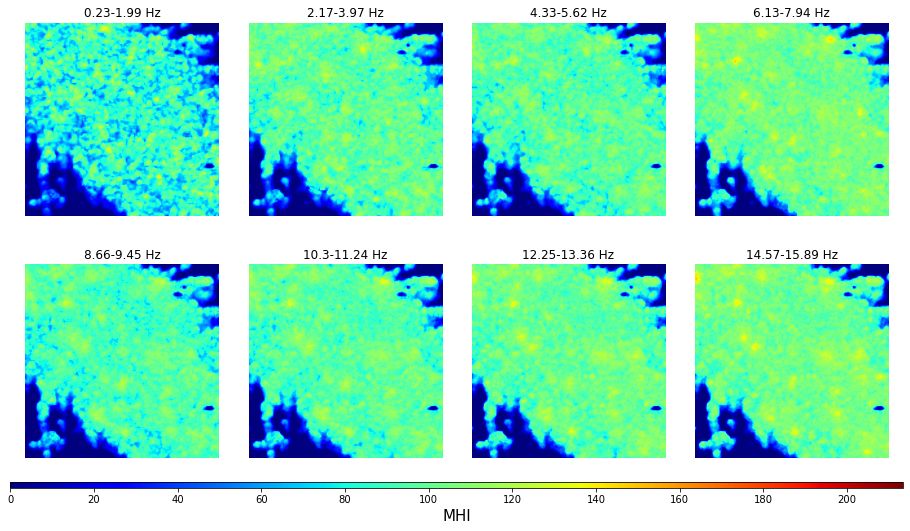

In [13]:
import matplotlib.pyplot as plt
from matplotlib import colors

k,l = 2,4

plt.rcParams["figure.figsize"] = (4*l,4*k)

fig, ax = plt.subplots(k,l)

images = []   

#THR = 10

for i in range(k):
    
    for j in range(l):
        
        #data = datapack(Drr+allfiles[j+l*i])
        data = DATOSPUTOS[j+l*i]
        
        MHI = graphmhi(data,THR)
        
        #MHI = graphim(data)

        print(np.max(MHI))
        
        #images.append(axs[i,j].imshow(maP[j+l*i],cmap='nipy_spectral'))
        images.append(ax[i,j].imshow(MHI,cmap='jet',interpolation='gaussian',alpha=3))
        ax[i,j].axis('off')
        ax[i,j].label_outer()

        ax[i,j].set_title(FLims[j+l*i])

# Find the min and max of all colors for use in setting the color scale.
#vmin = min(image.get_array().min() for image in images)
#vmax = max(image.get_array().max() for image in images)

#Will use the first image as criteria for colormap limits
#vmin = images[0].get_array().min()
#vmax = images[0].get_array().max()

norm = colors.Normalize(vmin=vmin, vmax=vmax)

for im in images:
    im.set_norm(norm)

Ticks = np.arange(vmin,vmax,20)
    
cm = fig.colorbar(images[0], ax=ax,ticks=Ticks, orientation='horizontal',fraction=0.1,aspect=150,anchor=(50,-.8))

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!

def update(changed_image):
    
    for im in images:
    
        if (changed_image.get_cmap() != im.get_cmap()
        
                or changed_image.get_clim() != im.get_clim()):
            
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)


fig.subplots_adjust( # the top of the subplots of the figure
wspace = 0,  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.25,  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
)

cm.set_label('MHI',fontsize=15)
#plt.suptitle('WAVELET TRANSFORM DECOMPOSITION',fontsize=25)

#Nparte = input('Parte de la planta')

plt.savefig(Nparte+'_descomposicion.png',dpi=200)

plt.show()

plt.clf()

plt.close()

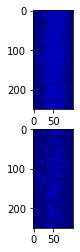

In [14]:
fig,ax = plt.subplots(2)

ax[0].imshow(graphmhi(DAT),vmin=vmin,vmax=vmax,cmap='jet')

ax[1].imshow(graphmhi(DATA),vmin=vmin,vmax=vmax,cmap='jet')

In [13]:
import os 

#Drr = 'Wavelet_decomposition\\Mimosa_pulvinus_secundario\\'
Drr = 'Wavelet_decomposition\\' +Dirs[n] + '\\'

allfiles=os.listdir(os.getcwd()+'\\'+Drr)

print(allfiles)

allfiles += [allfiles.pop(1)]
allfiles += [allfiles.pop(1)]
allfiles += [allfiles.pop(1)]

len(allfiles),allfiles


['0.245_1.959Hz', '10.164_11.084Hz', '12.087_13.181Hz', '14.374_15.675Hz', '2.137_3.919Hz', '4.273_5.542Hz', '6.044_7.838Hz', '8.547_9.32Hz']


(8,
 ['0.245_1.959Hz',
  '2.137_3.919Hz',
  '4.273_5.542Hz',
  '6.044_7.838Hz',
  '8.547_9.32Hz',
  '10.164_11.084Hz',
  '12.087_13.181Hz',
  '14.374_15.675Hz'])

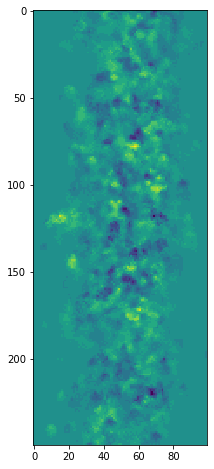

In [12]:
plt.imshow(data[0])

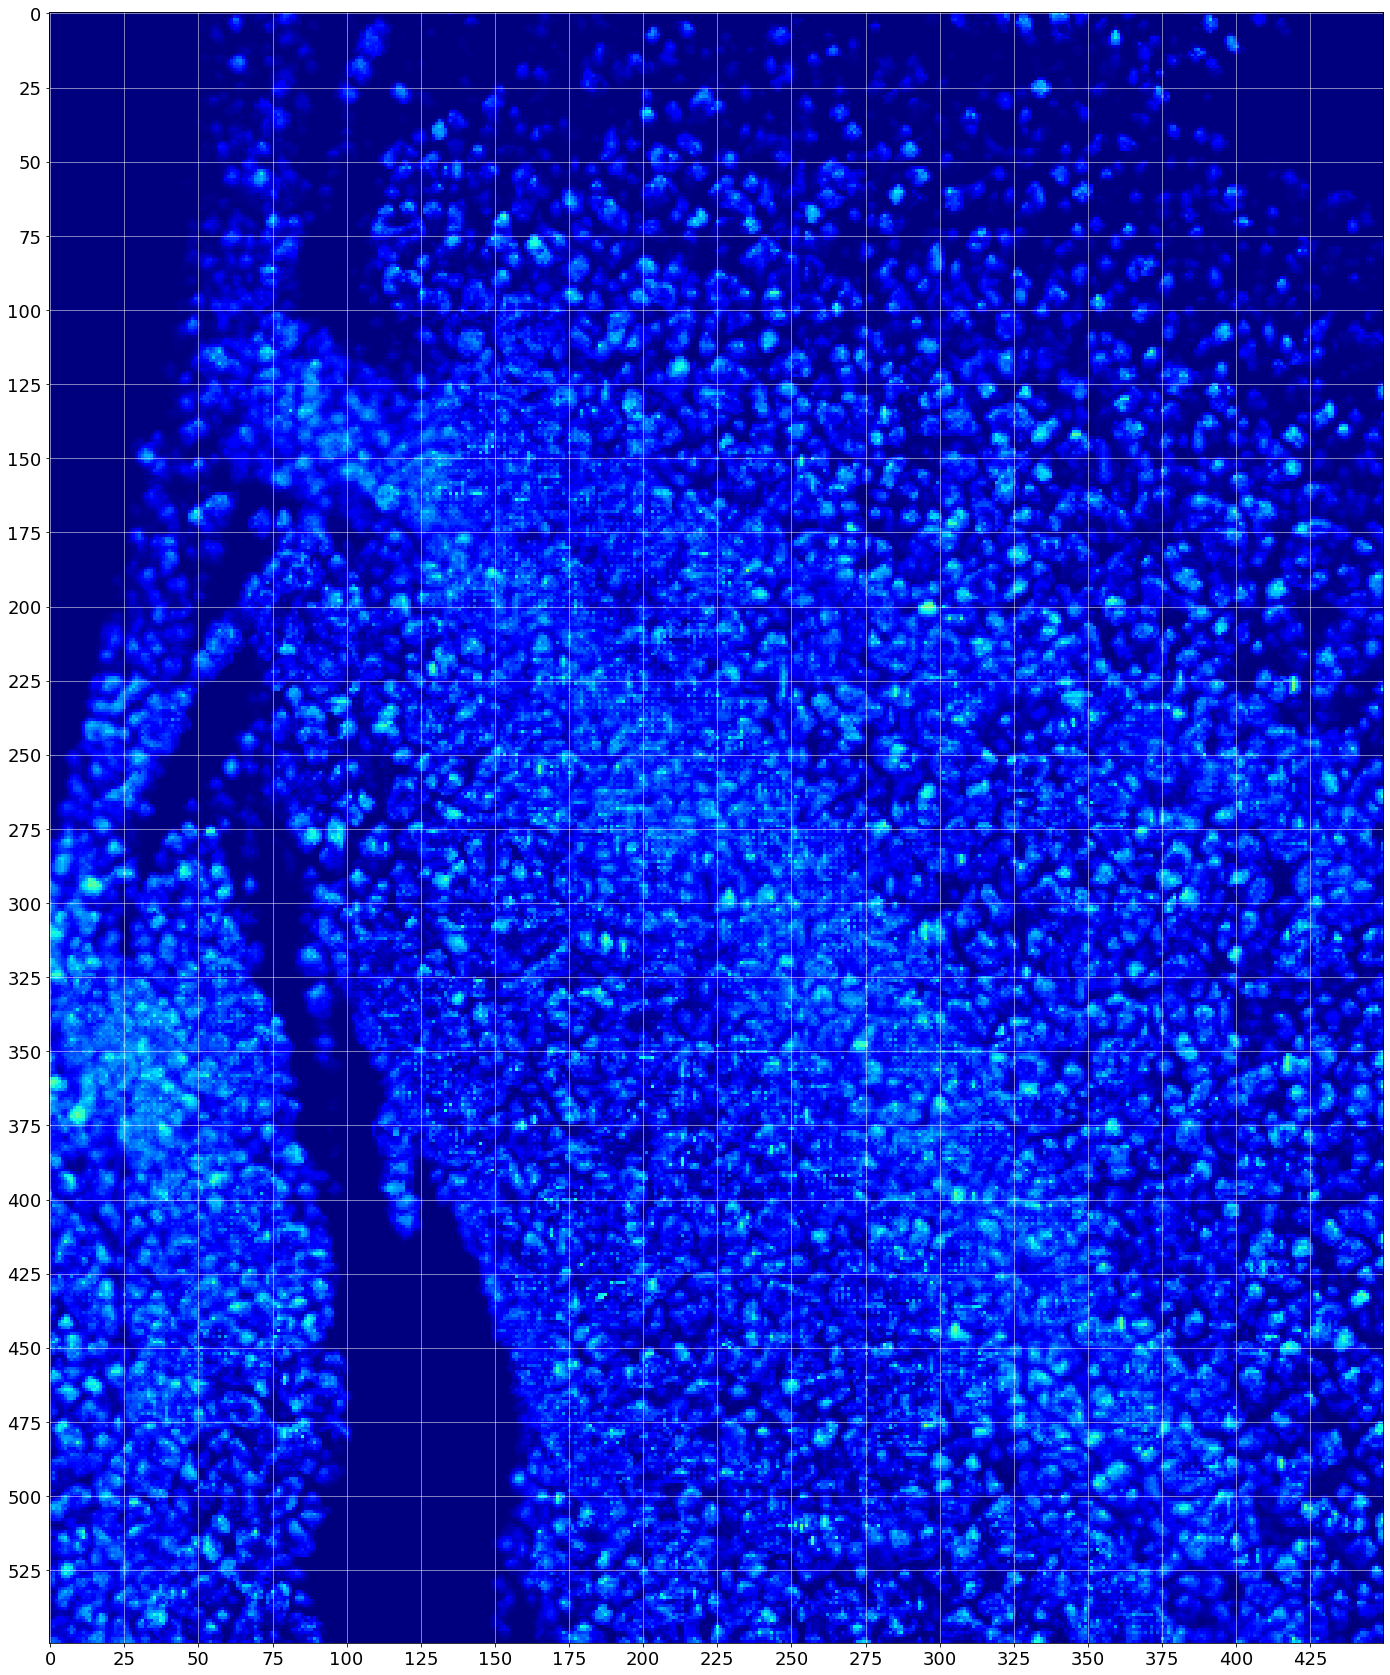

Sample name Nervadura_2
Tissue Nervadura_2
Number of samples >  5
Select x initial position 150
Select x final position 175
Select y initial position 200
Select y final position 225
Select x initial position 200
Select x final position 225
Select y initial position 250
Select y final position 275
Select x initial position 300
Select x final position 325
Select y initial position 375
Select y final position 400
Select x initial position 325
Select x final position 350
Select y initial position 450
Select y final position 475
Select x initial position 225
Select x final position 250
Select y initial position 275
Select y final position 300


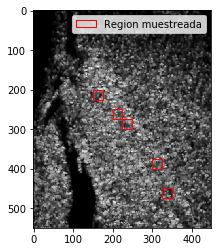

In [34]:
import copy as copy
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import numpy as np

D = copy.deepcopy(data)
MHI = graphmhi(data[0:600],THR=15)

#data = data[:,200:720,300:950]
plt.figure(0, figsize=(40,30))

#plt.imshow(D[0],cmap='gist_gray', vmin=0,vmax=255);
plt.imshow(MHI,cmap='jet', vmin=0,vmax=255);

if D.shape[2]-1 > 700:
    x= np.arange(0,D.shape[2]-1,50)
    y= np.arange(0,D.shape[1]-1,50)
else:
    x= np.arange(0,D.shape[2]-1,25)
    y= np.arange(0,D.shape[1]-1,25)
    
plt.xticks(x, fontsize=18)
plt.yticks(y, fontsize=18)
plt.grid(which="both", linewidth=0.5,color="w")
plt.show()

name = input('Sample name')

tissue = input('Tissue')

S = []

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.imshow(D[0],cmap='gist_gray', vmin=0,vmax=255);

N= int(input('Number of samples > '))

for i in range(N):
    
    x1 = int(input('Select x initial position'))
    x2 = int(input('Select x final position'))
    y1 = int(input('Select y initial position'))
    y2 = int(input('Select y final position'))
    
    if i ==0:
        rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none', label='Region muestreada')
    
    else:
        rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
    S.append(D[:,y1:y2,x1:x2])

plt.legend()

plt.savefig(str(name)+'.png',dpi=100,bbox_inches='tight')

plt.show()


In [35]:

import scipy.io

name = input('Enter a name to save the file: ')

for i in range(len(S)):

    scipy.io.savemat(name+'_'+str(i)+'.mat', {'data': S[i]})


Enter a name to save the file:  Nervadura_2


In [134]:

MHI = graphmhi(data,THR=15)


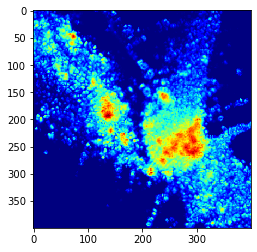

In [135]:

plt.imshow(MHI,cmap='jet')


In [133]:

import scipy.io

name = input('Enter a name to save the file: ')

scipy.io.savemat(name+'.mat', {'data': MHI})


Enter a name to save the file:  tallo_2


In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

allfiles = os.listdir(os.getcwd())

files = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
            if str('.mat') in i:
                files.append(i)
files

['peciolo_1.mat',
 'peciolo_2.mat',
 'pulvinus_primario_1.mat',
 'pulvinus_primario_2.mat',
 'pulvinus_secundario_1.mat',
 'pulvinus_secundario_2.mat',
 'pulvinus_terciario_1.mat',
 'pulvinus_terciario_2.mat',
 'tallo_1.mat',
 'tallo_2.mat']

peciolo_1.mat
peciolo_2.mat
pulvinus_primario_1.mat
pulvinus_primario_2.mat
pulvinus_secundario_1.mat
pulvinus_secundario_2.mat
pulvinus_terciario_1.mat
pulvinus_terciario_2.mat
tallo_1.mat
tallo_2.mat


10

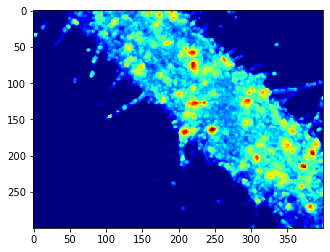

In [2]:
MHIs = []
import scipy.io
from scipy import ndimage, misc
    
for i in range(len(files)):
    print(files[i])
    MM = ndimage.median_filter(scipy.io.loadmat(files[i])['data'], size=3)
    plt.imshow(MM,cmap='jet')
    MHIs.append(MM)

    
len(MHIs)

In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt

allfiles = os.listdir(os.getcwd())

optico = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
            if str('.bmp') in i:
                optico.append(i)

optico

['Hoja_mimosa_grande_peciolo_optico_2.bmp',
 'Hoja_mimosa_grande_pulvinus_primario_optico_2.bmp',
 'Hoja_mimosa_grande_pulvinus_secundario_optico_2.bmp',
 'Hoja_mimosa_grande_pulvinus_terciario_optico.bmp',
 'Hoja_mimosa_grande_tallo_optico_2.bmp']

In [4]:
import cv2

OPT = []

for i in range(len(optico)):
    
    OPT.append(cv2.imread(optico[i]))
    

In [5]:
Mm =  []

for i in range(len(files)):
    
    Mm.append(np.max(MHIs[i]))
    Mm.append(np.min(MHIs[i]))
    
vmax = max(Mm)
vmin = min(Mm)

vmax,vmin


(161.93397342519268, 0.0)

In [75]:
MHIs[6].shape

(550, 450)

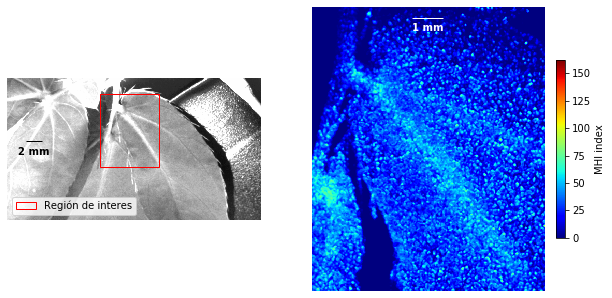

In [105]:
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=10,weight='bold')

fig,ax = plt.subplots(1,2,figsize=(10,20))


def add_sizebar(ax, psize, rsize,loc=8, color = 'white'):
    asb = AnchoredSizeBar(ax.transData,
                          psize,
                          str(rsize),
                          loc=loc,
                          pad=0.6, borderpad=0.5, sep=5, color=str(color),
                          frameon=False,fontproperties=fontprops)
    ax.add_artist(asb)

ax[0].imshow(OPT[3])

Escala = 1.7e-5
PIX= 2e-3/Escala

cs = ax[1].imshow(MHIs[6],cmap='jet',vmax=vmax,vmin=vmin)

add_sizebar(ax[0], 118, '2 mm', color='black',loc=6)

add_sizebar(ax[1], 59, '1 mm',color='white', loc=9)

ax[0].axis('off')
ax[1].axis('off')

cbar = fig.colorbar(cs,ax=ax[1],fraction=.035)

cbar.set_label(r'MHI index')

rect = patches.Rectangle((700,125),450,550,linewidth=1,edgecolor='r',facecolor='none', label='Región de interes')

ax[0].add_patch(rect)

ax[0].legend(loc='lower left')

#plt.suptitle('Tallo',fontsize=20, y=0.6)

plt.savefig('MHI_Hoja.png',dpi=100,bbox_inches='tight')

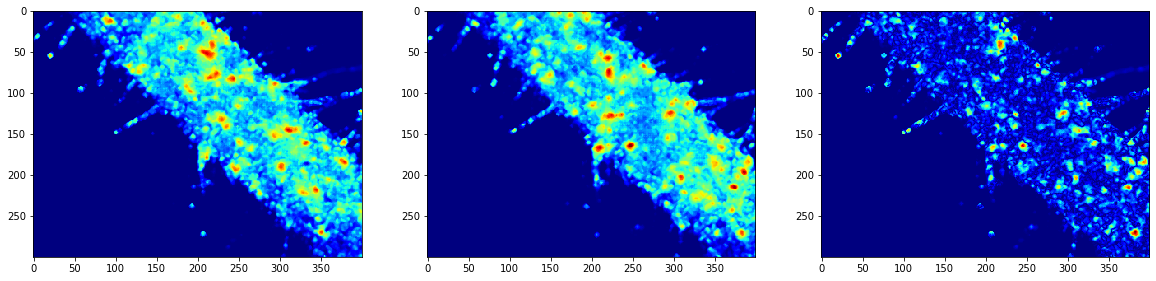

In [111]:
fig,ax = plt.subplots(1,3,figsize=(20,10))

i = 8

ax[0].imshow(MHIs[i],cmap='jet',vmax=vmax,vmin=vmin)

ax[1].imshow(MHIs[i+1],cmap='jet',vmax=vmax,vmin=vmin)

ax[2].imshow(abs(MHIs[i+1]-MHIs[i]),cmap='jet',vmin=vmin)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# some data (512x512)
import scipy.misc
data = scipy.misc.lena()

# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=MHI.min(), vmax=MHI.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(data))

# save the image
plt.imsave('test.png', image)



In [8]:
fps

31.35

In [121]:
Ftau = 3

Data = Select_frame_from_data(data,Ftau)

#Data = time_expousure_reconfig(data,Ftau)

Data.shape

(625, 550, 450)

In [119]:
fpsnew = Data.shape[0]/60

fpsnew

6.25

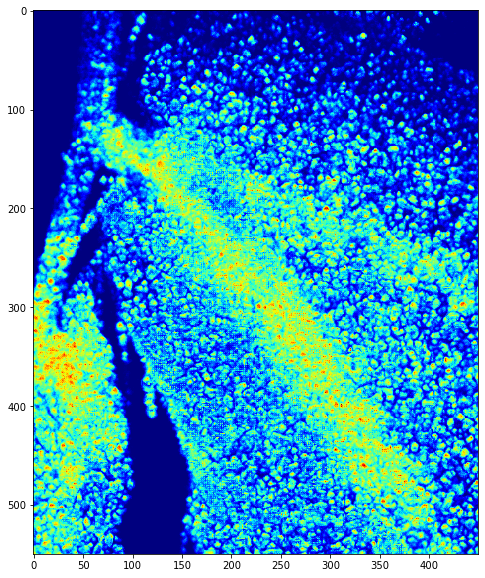

In [123]:
#MHI = graphmhi(data[0:600])

MHI = graphmhi(Data,THR=15)

plt.figure(figsize=(10,10))

plt.imshow(MHI,cmap='jet')

#plt.savefig('Mimosa_peciolo.png',dpi=200)


In [8]:
import scipy.io

DAT = []

for i in range(len(files)):
    
    DAT.append(scipy.io.loadmat(files[i])['data'])
